In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt

In [23]:
df = pd.read_csv('owid-covid-data.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [8]:
df1 = df[df['location'].str.contains('Thailand')]
df1.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139794,THA,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139795,THA,Asia,Thailand,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139796,THA,Asia,Thailand,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139797,THA,Asia,Thailand,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139798,THA,Asia,Thailand,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN


In [24]:
df1 = df1[['location', 'date', 'new_cases']]

In [25]:
df1.isnull().sum()

location      0
date          0
new_cases    19
dtype: int64

In [26]:
df1['date'] = pd.to_datetime(df['date'])
df1.index = df1['date']
df1.index = (df1.index - pd.to_datetime('1970-01-01')).days
df1

,location,date,new_cases
date,,,
18265,Thailand,2020-01-04,NaN
18266,Thailand,2020-01-05,NaN
18267,Thailand,2020-01-06,NaN
18268,Thailand,2020-01-07,NaN
18269,Thailand,2020-01-08,NaN
...,...,...,...
19011,Thailand,2022-01-19,44447.0
19012,Thailand,2022-01-20,8640.0
19013,Thailand,2022-01-21,8112.0


In [27]:
df1.fillna(0, inplace =True )

In [28]:
y = np.asarray(df1['new_cases'])
X = np.asarray(df1.index.values)

In [29]:
regression_model = LinearRegression()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X_transform = poly.fit_transform(X.reshape(-1, 1))
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [31]:
y_learned = regression_model.predict(X_transform)

In [32]:
newindex = np.asarray(pd.RangeIndex(start = 19015 , stop = 19015+150))

In [33]:
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

y_predict = regression_model.predict(X_extended_transform)

In [36]:
X = pd.to_datetime(df1.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

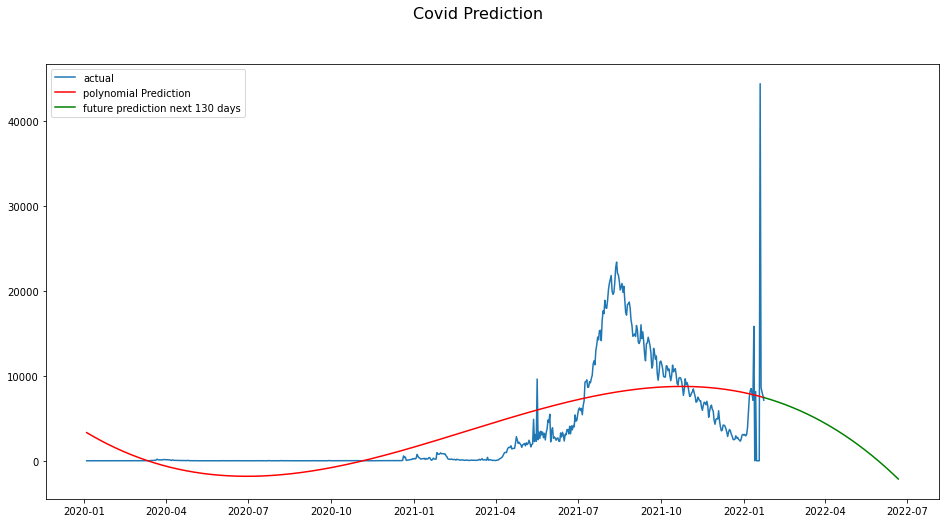

In [37]:
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(X,df1['new_cases'], label='actual')
#Plot the regression model
plt.plot(X,y_learned, color='r', label='polynomial Prediction')
#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='future prediction next 130 days')
#Set the title of the graph
plt.suptitle('Covid Prediction', fontsize=16)

plt.legend()
#display the graph
plt.show()